## Lab 1 

### Import necesary libraries

In [2]:
import pandas as pd             #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
import numpy as np              # https://numpy.org/doc/stable/user/quickstart.html
import matplotlib.pyplot as plt # https://matplotlib.org/stable/tutorials/introductory/pyplot.html

### Pandas

In [3]:
dataset = pd.read_csv('Data.csv')
dataset.head()    # returns the first n rows for the object (default = 5) 

,Department,Age,Tution,Enrolled
0,Math,24.0,32000.0,No
1,CSC,17.0,48000.0,Yes
2,ECE,20.0,24000.0,No
3,CSC,18.0,31000.0,No
4,ECE,21.0,NaN,Yes


In [4]:
X = dataset.iloc[:, :-1].values # numpy array
print(X)

[['Math' 24.0 32000.0]
 ['CSC' 17.0 48000.0]
 ['ECE' 20.0 24000.0]
 ['CSC' 18.0 31000.0]
 ['ECE' 21.0 nan]
 ['Math' 25.0 28000.0]
 ['CSC' nan 32000.0]
 ['Math' 18.0 29000.0]
 ['ECE' 19.0 33000.0]
 ['Math' 19.0 27000.0]]


In [5]:
Y = dataset.iloc[:, -1]  # dataframe
print(Y)

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Enrolled, dtype: object


In [6]:
# alternatively
Y = dataset['Enrolled']
Y

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Enrolled, dtype: object

### Handling missing data

In [8]:
from sklearn.impute import SimpleImputer # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer = SimpleImputer()
imputer.fit(X[:, 1:3])
(X[:, 1:3]) = imputer.transform(X[:, 1:3])
X

array([['Math', 24.0, 32000.0],
       ['CSC', 17.0, 48000.0],
       ['ECE', 20.0, 24000.0],
       ['CSC', 18.0, 31000.0],
       ['ECE', 21.0, 31555.555555555555],
       ['Math', 25.0, 28000.0],
       ['CSC', 20.11111111111111, 32000.0],
       ['Math', 18.0, 29000.0],
       ['ECE', 19.0, 33000.0],
       ['Math', 19.0, 27000.0]], dtype=object)

### <font color="red">Write a brief description of what SimpleImputer does and describes its actions in the context of the above example.</font>

// write answer here
On X[:, 1:3], all rows and the first three columns  are selected.

On the third line, fit  stores the mean value as calculated on the training data set, using strategy mean(default when SimpleImputer was initialized) to fill in the missing value (default=np.nan), then uses it on test data during the transform. 

On the fourth line, we use SimpleImputer to replace missing values with the mean value along each column. Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). 

So what Simple Imputer did here is finding the mean of all the rows and replacing the uninitialized cell by the mean value of that column. 


### Numpy 

In [9]:
type(X)

numpy.ndarray

In [10]:
X.shape  # returns the dimensions of the numpy array

(10, 3)

In [11]:
X.size   # returns the total number of elements of the numpy array

30

### Data visualization example (Matplotlib)

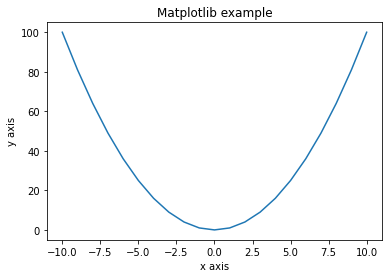

In [12]:
x = np.arange(-10,11) # (start, stop(exclusive)[-10, -9, ..., 9, 10])
y = x*x 
plt.title("Matplotlib example") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(x,y) 
plt.show()

### Simple regression with sklearn

In [13]:
df = pd.read_csv('Data2.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

print(y_test)

[ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


### Visualizing result

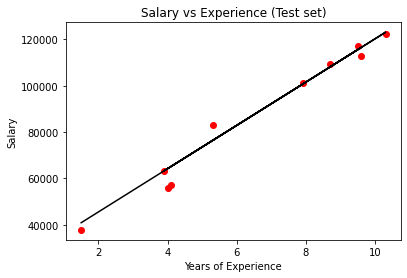

In [16]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'black')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Plot the function $f(x)=x^{2}$.

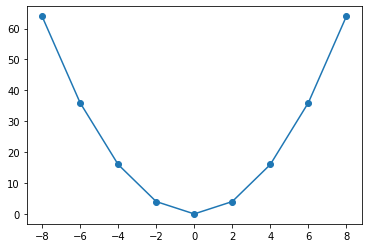

In [17]:
x = np.arange(-8,9,2)
y = x ** 2

plt.scatter(x, y)
plt.plot(x, y)
plt.show()

### Create a bar chart of the given data.

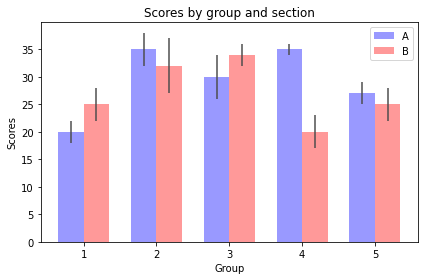

In [18]:
n_groups = 5

means_A = (20, 35, 30, 35, 27)
std_A = (2, 3, 4, 1, 2)

means_B = (25, 32, 34, 20, 25)
std_B = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_A, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=std_A,
                 error_kw=error_config,
                 label='A')

rects2 = plt.bar(index + bar_width, means_B, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=std_B,
                 error_kw=error_config,
                 label='B')

plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and section')
plt.xticks(index + bar_width / 2, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

### Generate 5000 numbers using a standard normal distrobution and display a histogram of the data.

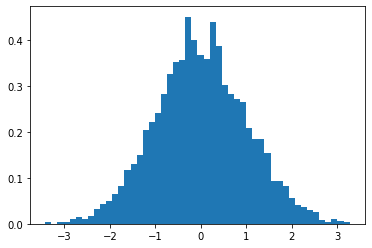

In [19]:
x = np.random.randn(5000)

# Make a normed histogram.
plt.hist(x, bins=50, density=True)
plt.show()

### <font color="red">Pick a polynominal function and generate 500 random points (uniform distribution) along the function for a range of your choice. To each of those points, add some random noise (normal distribution).</font>

### <font color="red">Plot the points and the function and include an appropriate axes labels, a title, and a legend.</font>

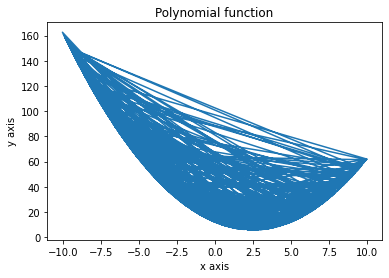

In [23]:
# write code here
# function => f(x) = x*x - 5x + 12
x = np.random.uniform(-10.0, 10.0, 500) 
noise = np.random.normal(0, .1, x.shape)
x = x+noise
y = x*x - (5*x) + 12
plt.title("Polynomial function") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.plot(x,y) 
plt.show()


### <font color="red">Generate and plot a histogram with 10 bins of the squared error of your data, and generate and plot a histogram with 25 bins of the noise in your data. Give each plot appropriate axes and a title.</font>

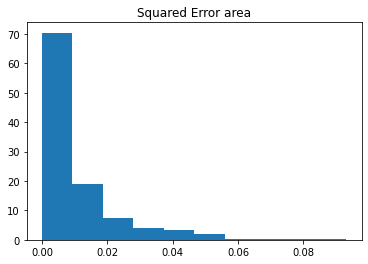

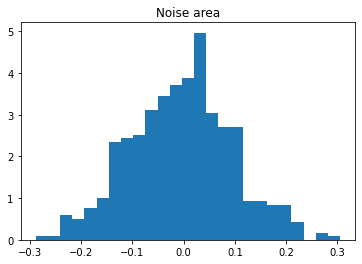

In [34]:
# write code here
noise = np.random.normal(0, .1, x.shape)
plt.title("Squared Error area") 
plt.hist(noise*noise, bins=10, density=True)
plt.show()


plt.title("Noise area") 
plt.hist(noise, bins=25, density=True)
plt.show()